# Bay Wheels's Trip Data Analysis

In this notebook I analyzed the [Bay Wheels's Trip Data](https://www.lyft.com/bikes/bay-wheels/system-data). This dataset collected various sets of information on each individual bike trip including bike ID, trip Duration, start time and date, end time and date, start station ID, start station name, start station latitudeand and longitude, end station ID, end station name, end station latitude and longitude since 2013. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
trip = pd.read_csv('trip.csv')
trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


# Data Wrangling

In [3]:
trip=trip.rename(columns={"bike id":"bike_id","start date": "start_date","start station name": "start_station_name","start station id":"start_station_id","end date":"end_date","end station name":"end_station_name","end station id":"end_station_id","subscription type":"subscription_type","zip code":"zip_code"})
trip.dropna(inplace= True)
trip['start_date'] = pd.to_datetime(trip['start_date'])

# Number of available bikes at each station.

Text(0, 0.5, 'Number of available bikes ')

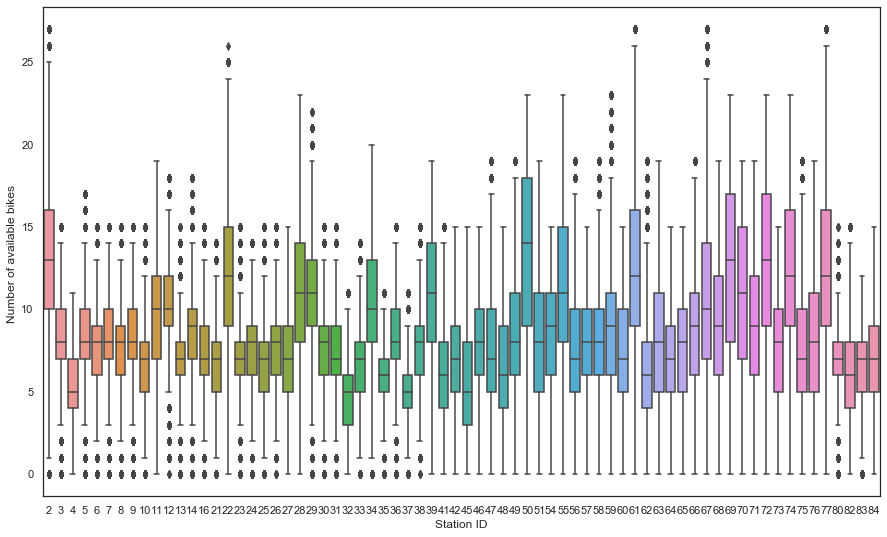

In [4]:
plt.figure(figsize=(15,9))
sns.set(style="white", palette="Set2")
sns.boxplot(data = trip, x = 'station_id', y = 'bikes_available')
plt.xlabel("Station ID")
plt.ylabel("Number of available bikes ")

#### Observation:

It seems that stations 2-38 are less likely to run out of bikes as compared to stations 39-77. Looking at the station names in the csv file, it is obvious that station 39-77 are more popular because they are in the city of San Francisco.  Some of the less used stations are as far out as San Jose.  



# Number of bike trips per month over the first three years

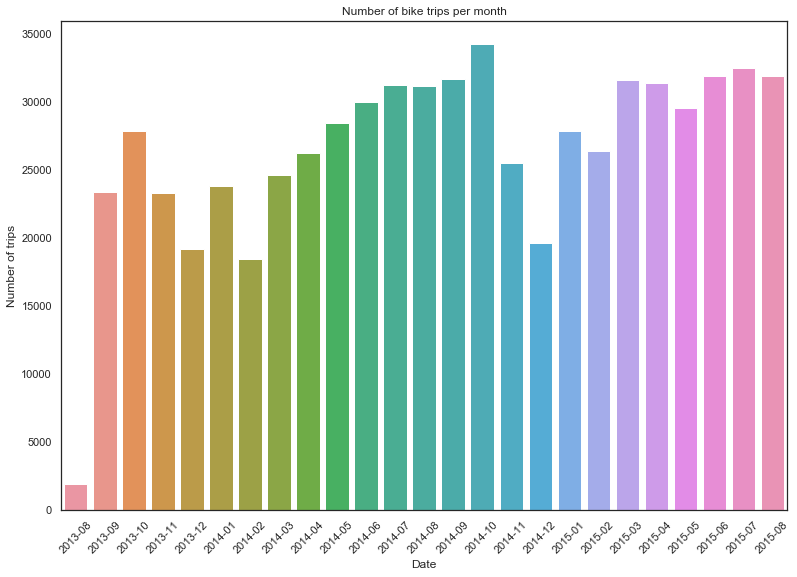

In [5]:
trip.index = trip['start_date']
monthly_trips = trip.resample('M').size() 
monthly_trips= pd.DataFrame(monthly_trips) 
monthly_trips.columns = ['trip_count']
monthly_trips['date']= monthly_trips.index
monthly_trips['date'] = monthly_trips['date'].dt.strftime('%Y-%m')
plt.figure(figsize=(13,9))
sns.set_palette('bright')
ax = sns.barplot(data = monthly_trips, x = 'date', y = 'trip_count')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of trips")
plt.title("Number of bike trips per month") 

#### Observation:

Looks like usership ramped up to 25,000 trips per month quickly.  There was more fluctuation in 2013 and early 2014, but then trip numbers stabilized around 30,000 per month.  There is a drop-off seen for November and December of 2014 probably due to the holidays.  January and February are a little bit less utilized, perhaps due to weather (?), but trip numbers once again stabilize around 30,000 from March 2015 onward. This information could be used to schedule bike/ station maintenance.  